![image](new-statistics.jpg)

# <center> Estadísticas UNED </center>

# <center> Grado en matemáticas </center>

Este es un pequeño resumen de algunas de las estadísticas de las asignaturas del Grado en Matemáticas de la UNED.

He creido conveniente unificar las estadísticas de varios años para cada asignatura para que sea fácil y rápido comparar ~~la dificultad~~ las asignaturas entre sí.

## Definiciones

#### <a name='tasadeexitoenexamenes'/>Tasa de éxito en exámenes </a>
$$ \text{Tasa de éxito de examenes realizados} = \frac{\text{Exámenes aptos}}{\text{Exámenes realizados}} $$

## <a name='codigofuente'/>Código fuente </a>

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
import random # TODO: Delete when finished
import plotly.plotly as py

# line for plotting in SVG format
# %config InlineBackend.figure_format = 'svg'

%matplotlib inline

import plotly
import plotly.offline as py
import plotly.graph_objs as go
# run at the start of every ipython notebook to use plotly.offline
py.init_notebook_mode(connected=True) # this injects the plotly.js source files into the notebook

In [2]:
DIRECTORY = '/Users/Dani/Documents/Desarrollo/Data_analysis/UNED/UNED-Statistics-Mathematics/input/'
data = pd.DataFrame()
list_ = []
files = [f for f in os.listdir(DIRECTORY) if f[0] is not '.']
for file in files:
    df = pd.read_csv(os.path.join(DIRECTORY, file), header=2, decimal=',')
    list_.append(df)
data = pd.concat(list_)

# Deleting columns with no students data
mask = data['ESTUD. MATRICULADOS'] == 0
data = data[~mask]

In [3]:
def subject_name(subject_id):
    return data[data['ID'] == str(subject_id)].iloc[0, 4]

In [4]:
identifiers = data.loc[:, 'ID'].unique()
# display(Markdown("<a id='indice'></a>"))
# for n in range(1,5):
#     display(Markdown("## Curso {}".format(str(n))))
#     for element in identifiers:
#         if element[4] == str(n):
#             text = "[{} - {}](#{})".format(subject_name(element), element, element)
#             display(Markdown(text))

In [5]:
def success_rate(i, year):
    mask = (data['CURSO'] == year) & (data['ID'] == str(i))
    return float(data[mask]['Nº EXÁM. APTOS']/data[mask]['Nº EXÁM. REALIZADOS'])

In [6]:
def subjects_by_curso(c):
    return [element for element in identifiers if element[4] == str(c)]

In [7]:
def subject_years(i):
    return np.array(data.loc[data['ID'] == str(i), 'CURSO'])

In [8]:
def show_success_rate(subject_id):
    name = subject_name(subject_id)
    
    link = "<a id='{}'></a>".format(subject_id)
    head = "### {} - {} - ([Volver al índice](#indice))".format(name, subject_id)
    display(Markdown(link))
    display(Markdown(head))
    
    with plt.style.context('bmh'):
        colors = ['#339f34', '#ececec']
        labels = ['Aptos', 'No aptos']
        plt.figure(0, figsize=(6, 6))
        plt.rcParams['font.size'] = 9.0
        
        ax1 = plt.subplot2grid((3, 3), (2, 0))
        ax2 = plt.subplot2grid((3, 3), (1, 0))
        ax3 = plt.subplot2grid((3, 3), (0, 0))
        ax4 = plt.subplot2grid((3, 3), (0, 1))
        ax5 = plt.subplot2grid((3, 3), (0, 2))
        ax6 = plt.subplot2grid((3, 3), (1, 1), colspan=2, rowspan=2)
        ax = [ax1, ax2, ax3, ax4, ax5, ax6]
        plt.suptitle('Tasa de éxito en examenes - ' + name)
    
        years = subject_years(subject_id)
        if years.size > 5:
            print('ERROR: too many data: redesign grid')
    
        for index, year in enumerate(reversed(years)):
            complementary_graph_index = 4 - index
            x = success_rate(subject_id, year)
            ax[complementary_graph_index].pie([x, 1 - x], colors=colors, autopct='%1.2f%%', startangle=90)
            ax[complementary_graph_index].set_title(str(year), fontsize=8)
    
        x = np.array([success_rate(subject_id, n) for n in years]).mean()
        patches, t1, t2 = ax[5].pie([x, 1 - x], colors=colors, autopct='%1.2f%%', startangle=90)
        ax[5].set_title('Media', fontsize=8)
        plt.legend(patches, labels, loc='best')
    
    plt.axis('equal')
    plt.show()

In [9]:
random_subject = identifiers[random.randint(0,identifiers.size - 1)]
print(subject_name(random_subject))
rates = np.array([success_rate(random_subject, i) for i in subject_years(random_subject)])
rates.mean()

ANÁLISIS DE FOURIER Y ECUACIONES EN DERIVADAS PARCIALES


0.91706539074960125

In [10]:
subject_rate_means = []
names = np.array([subject_name(s) for s in identifiers])
for subject in identifiers:
    rates = np.array([success_rate(subject, year) for year in subject_years(subject)])
    subject_rate_means.append(rates.mean())

In [11]:
df = pd.DataFrame({'Subject': names, 'Success rate': subject_rate_means})

In [12]:
df = df.sort_values(by='Success rate')

In [13]:
for s in subjects_by_curso(4):
    print(subject_name(s))

AMPLIACIÓN DE TOPOLOGÍA
AMPLIACIÓN DE VARIABLE COMPLEJA
ANÁLISIS MULTIVARIANTE (MATEMÁTICAS)
ASTROFÍSICA GENERAL
ESPACIOS NORMADOS
FÍSICA MATEMÁTICA
GEOMETRÍA DIFERENCIAL
HISTORIA DE LAS MATEMÁTICAS
INGLÉS CIENTÍFICO
INTEGRAL DE LEBESGUE
INTRODUCCIÓN A LA ASTRONOMÍA
MODELOS DE REGRESIÓN
MODELOS ESTOCÁSTICOS
PROCESOS ESTOCÁSTICOS
TEORÍA DE JUEGOS (MATEMÁTICAS)
TEORÍA DE LA DECISIÓN
TEORÍA DE MUESTRAS
TRABAJO FIN DE GRADO (MATEMÁTICAS)
SISTEMAS DINÁMICOS


In [14]:
subject_name(61044112)

'ASTROFÍSICA GENERAL'

<a id='61024090'></a>

### AMPLIACIÓN DE TOPOLOGÍA - 61024090 - ([Volver al índice](#indice))

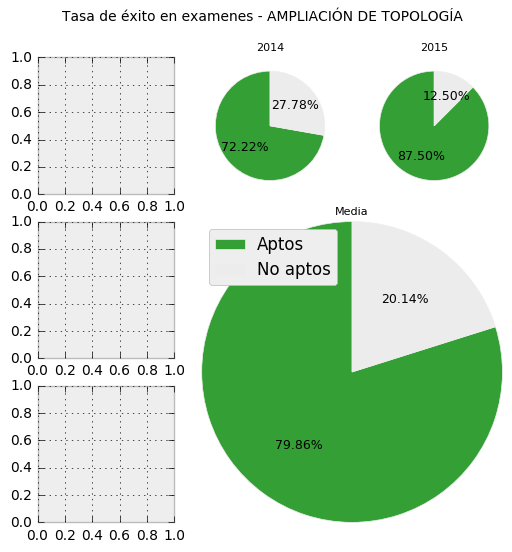

In [20]:
show_success_rate(61024090)